In [1]:
import pandas as pd
dt=pd.read_csv("Mall_Customers.csv")
print("Data Read!")

Data Read!


In [2]:
dt.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Check for missing values in the dataset
print(dt.isnull().sum())


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


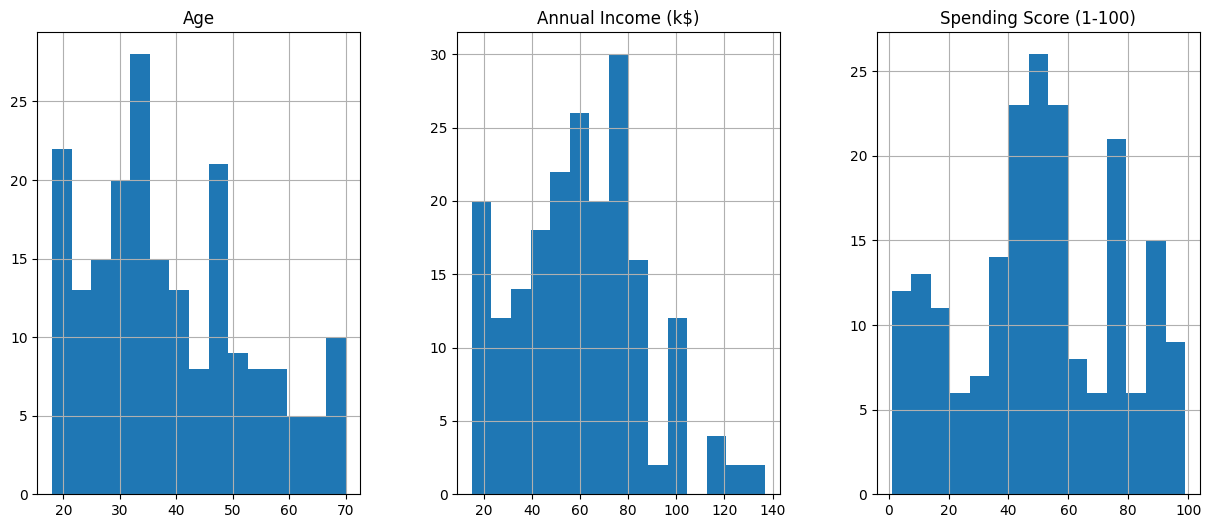

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for age, income and spending score
dt[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].hist(bins=15, figsize=(15, 6), layout=(1, 3))
plt.show()


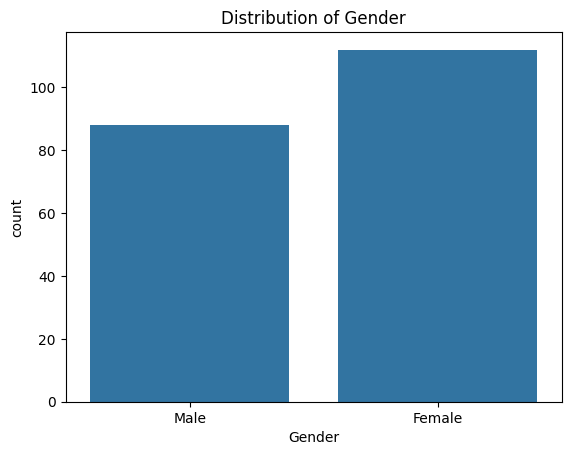

In [9]:
# Count plot for gender
sns.countplot(x='Gender', data=dt)
plt.title('Distribution of Gender')
plt.show()


In [11]:
# If there's categorical data like Gender, you might want to convert it to numerical:
dt['Gender'] = dt['Gender'].map({'Female': 0, 'Male': 1})

# Selecting relevant features for clustering:
X = dt[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


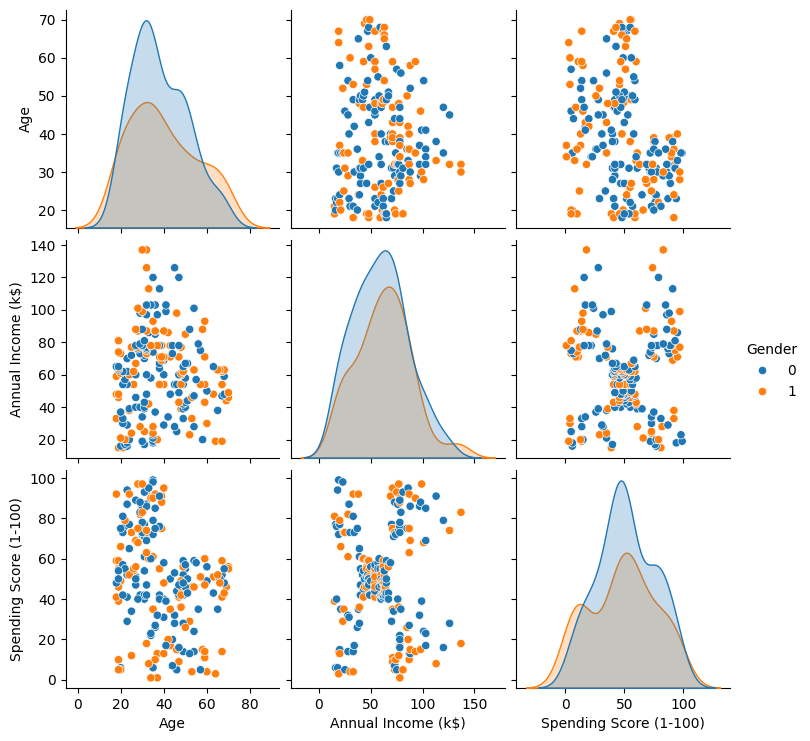

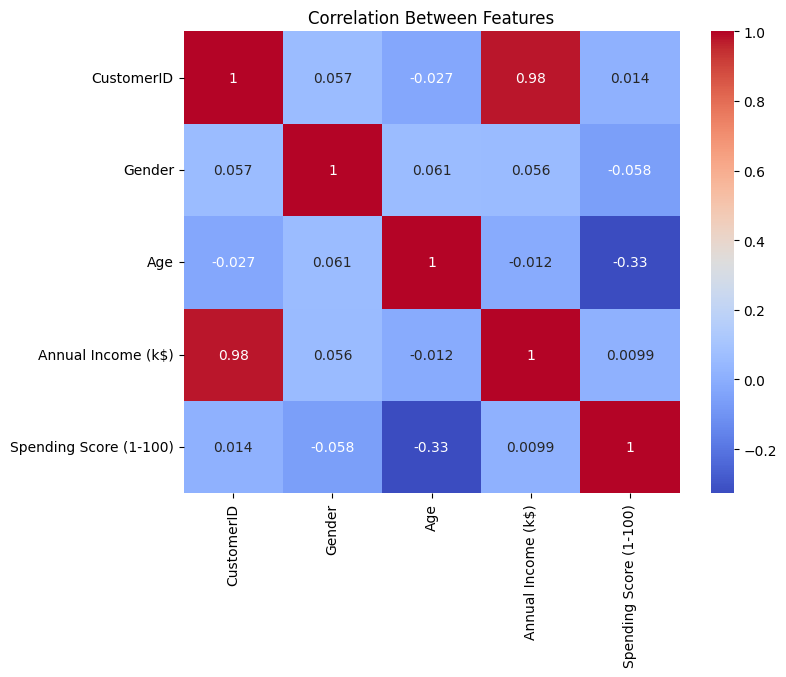

In [12]:
# Pairplot to visualize the relationships between Age, Annual Income, and Spending Score
sns.pairplot(dt, hue='Gender', vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.show()

# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dt.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()


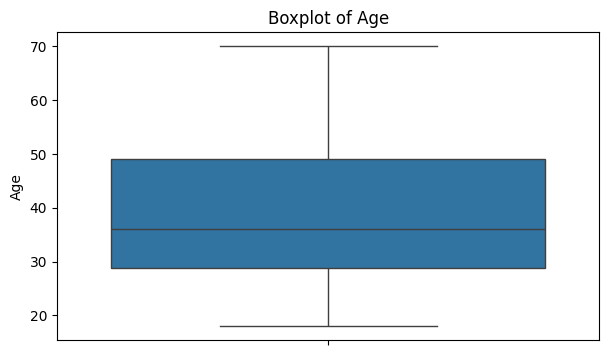

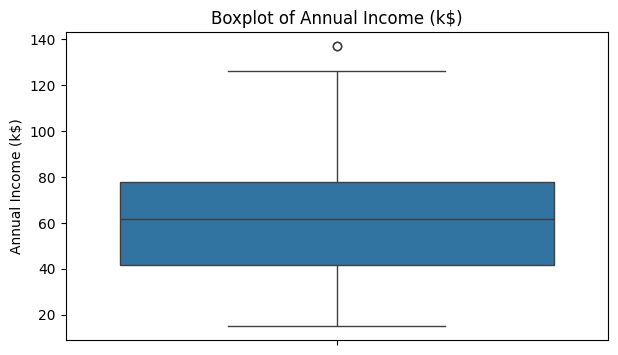

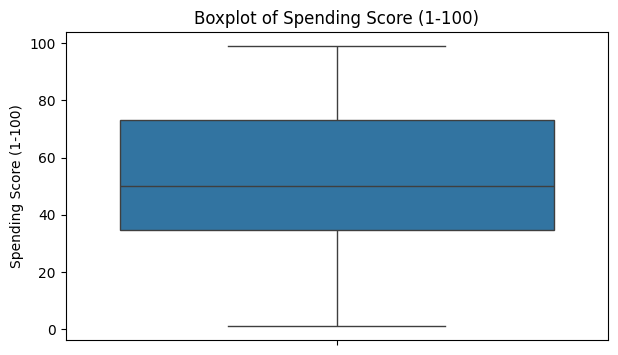

In [14]:



# Boxplots to check for outliers in the numerical columns
for column in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    plt.figure(figsize=(7, 4))
    sns.boxplot(dt[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dt[['Annual Income (k$)', 'Spending Score (1-100)']])  # Scaling the features
# Choose a number of clusters based on strategic decisions
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
dt['Cluster'] = clusters



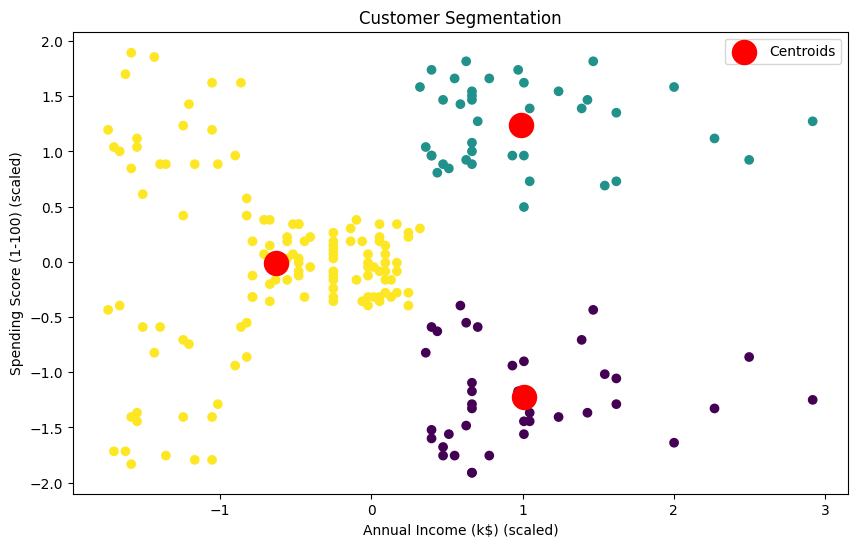

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$) (scaled)')
plt.ylabel('Spending Score (1-100) (scaled)')
plt.legend()
plt.show()


In [18]:
from sklearn.metrics import silhouette_score

# Assuming 'data_scaled' is your scaled feature set and 'clusters' are the cluster labels from K-Means
score = silhouette_score(data_scaled, clusters)
print('Silhouette Score: {:.2f}'.format(score))


Silhouette Score: 0.47
